In [1]:
import sys , ROOT
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/mySoftwarePackage/mac')
import pylab , numpy as np , pandas as pd , matplotlib as mpl , matplotlib.pyplot as plt , matplotlib.ticker as ticker , seaborn as sns
mpl.use('Agg')
from root_numpy import tree2array 
from ROOT import TPlots, TSchemeDATA
from larlite import *
from ROOT import PandoraNuTrack
import GeneralPlot as gp , Initiation as init, plot_tools as pt , my_tools
from root_pandas import read_root
dirname = init.createnewdir()
scheme  = TSchemeDATA()
%matplotlib inline
DataName = "MC_BNB"
main_path = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna"
anafiles_path = main_path + "/TracksAnaFiles"
labels = ['proton' , 'muon', 'pion' , 'em' ]
colors = ['purple' , 'black', 'blue', 'red' ]

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [29]:
branches_fast=['dEdx_Y','residual_range_Y','Edep_Y']
def read_tree_fast(filename,label='protons'):
    print 'processing %s data'%label
    print filename
    f = ROOT.TFile( anafiles_path + "/" + filename )
    tree = f.Get('TracksTree')
    print tree
    ana_arr = tree2array(tree,branches=branches_fast)
    resrange = np.concatenate(ana_arr['residual_range_Y']).ravel().tolist()
    dEdx = np.concatenate(ana_arr['dEdx_Y']).ravel().tolist()
    Edep = np.concatenate(ana_arr['Edep_Y']).ravel().tolist()
    df = pd.DataFrame(data={'residual-range':resrange,'dE/dx':dEdx,'Edep':Edep})

    data = df[df['residual-range']<100]
    data = data[data['residual-range']>0.1]
    data = data[data['dE/dx']>0.1]
    data = data[data['dE/dx']<30]
    print 'len(data %s) = %d'%(label,len(data))
    f.Close()
    print 'read %s data'%label
    return data

cols_Float_t=['length','pidpida' , 'pidchi','dqdx_ratio','cfdistance','avg_dqdx','MCpdgCode','purtruth_Y']
def read_tree_Float_t_branches(filename,label='protons'):
    print 'processing %s data'%label
    f = ROOT.TFile( anafiles_path + "/" + filename )
    tree = f.Get('TracksTree')
    print tree
    ana_arr = tree2array(tree,branches=cols_Float_t)
    length = np.concatenate(ana_arr['length']).ravel().tolist()
    pidpida = np.concatenate(ana_arr['pidpida']).ravel().tolist()
    pidchi = np.concatenate(ana_arr['pidchi']).ravel().tolist()
    dqdx_ratio = np.concatenate(ana_arr['dqdx_ratio']).ravel().tolist()
    avg_dqdx = np.concatenate(ana_arr['avg_dqdx']).ravel().tolist()
    cfdistance = np.concatenate(ana_arr['cfdistance']).ravel().tolist()
    MCpdgCode = np.concatenate(ana_arr['MCpdgCode']).ravel().tolist()
    purtruth_Y = np.concatenate(ana_arr['purtruth_Y']).ravel().tolist()
    df = pd.DataFrame(data={'length':length,'pidchi':pidchi,'pidpida':pidpida,
                            'dqdx_ratio':dqdx_ratio,'cfdistance':cfdistance,
                           'avg_dqdx':avg_dqdx , 'MCpdgCode':MCpdgCode , 'purtruth_Y':purtruth_Y})
    df = df[df['dqdx_ratio']<10000]
    f.Close()
    print 'read %s data'%label
    return df


def plot_dEdx_single_dataset( df , label='muons', Nmax = 10000):
    data = df[0:Nmax]
    if label=='protons': color='purple'
    elif label=='muons': color='black'
    elif label=='pions': color='blue'
    elif label=='em': color='red'
    print 'processing plot for ',label
    print 'len(data %s) = %d'%(label,len(data))
    g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color)
    print 'generated sns plot....'
    ax = g.ax_joint
    ax.text(30,0.8*data['dE/dx'].max(),label,color=color,fontsize=20)
    g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
    print 'done generating plot for ',label
        
def plot_dEdx_profile( df_p, df_mu , df_pi , df_em ,Nmax = 10000):
    for df , color, label in zip([df_p,df_mu,df_pi,df_em],colors,labels):
        data = df[0:Nmax]
        print 'processing plot for ',label
        print 'len(data %s) = %d'%(label,len(data))
        print "data['dE/dx'].min():",data['dE/dx'].min()
        print "data['residual-range'].min():",data['residual-range'].min()

        g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color,
                        marginal_kws=dict(bins=10))
        ax = g.ax_joint
        ax.text(30,15,label,color=color,fontsize=20)
        g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
        print 'done generating plot for ',label
        
def plot_var_x( df_list , var , xmin=0,xmax=80,DoAllOnSamePlot=False):
    if DoAllOnSamePlot:
        fig , ax = plt.subplots()
        pt.set_axes(ax , 'tracks %s'%var , '')

    bins = np.linspace(xmin,xmax,100)
    for df , color, label in zip(df_list,colors[0:len(df_list)],labels[0:len(df_list)]):
        print 'processing plot for ',label
        if DoAllOnSamePlot==False:
            fig , ax = plt.subplots()
            pt.set_axes(ax , 'tracks %s'%var , '')
            plt.hist(df[var], bins=bins, color=color , label=label , alpha=0.5)
        else:
             plt.hist(df[var], bins=bins, color=color , label=label , alpha=0.3 , normed=1)
        print 'done generating plot for ',label
        plt.legend()

In [30]:
df_MCBNB = read_tree_Float_t_branches("Tracks_MC_BNB_AnalysisTrees.root",label='all')
df_MCBNB_protons = df_MCBNB[df_MCBNB.MCpdgCode==2212]
df_MCBNB_nonprotons = df_MCBNB[df_MCBNB.MCpdgCode!=2212]

processing all data
<ROOT.TTree object ("TracksTree") at 0x7fa65adfbe00>
read all data


In [15]:
df_muons = read_tree_fast("Tracks_muminus_0-2.0GeV_isotropic_AnalysisTrees.root",label='muons')
df_muons_highpurity = read_tree_fast("Tracks_muminus_0-2.0GeV_isotropic_MCmuons_high_purity_AnalysisTrees.root",label='muons')
df_muons_lowpurity = read_tree_fast("Tracks_muminus_0-2.0GeV_isotropic_MCmuons_low_purity_0.50_AnalysisTrees.root",label='muons')
df_muons_float = read_tree_Float_t_branches("Tracks_muminus_0-2.0GeV_isotropic_AnalysisTrees.root",label='muons')
df_muons_highpurity_float = read_tree_Float_t_branches("Tracks_muminus_0-2.0GeV_isotropic_MCmuons_high_purity_AnalysisTrees.root",label='muons')
df_muons_lowpurity_float = read_tree_Float_t_branches("Tracks_muminus_0-2.0GeV_isotropic_MCmuons_low_purity_0.50_AnalysisTrees.root",label='muons')

processing muons data
Tracks_muminus_0-2.0GeV_isotropic_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66f8af080>
len(data muons) = 437823
read muons data
processing muons data
Tracks_muminus_0-2.0GeV_isotropic_MCmuons_high_purity_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66ef336f0>
len(data muons) = 185738
read muons data
processing muons data
Tracks_muminus_0-2.0GeV_isotropic_MCmuons_low_purity_0.50_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa675bfbe00>
len(data muons) = 16681
read muons data
processing muons data
<ROOT.TTree object ("TracksTree") at 0x7fa675bfbe00>
read muons data
processing muons data
<ROOT.TTree object ("TracksTree") at 0x7fa675bfbe00>
read muons data
processing muons data
<ROOT.TTree object ("TracksTree") at 0x7fa66ef336f0>
read muons data


In [16]:
df_protons = read_tree_fast("Tracks_p_0.02-1.5GeV_isotropic_AnalysisTrees.root",label='protons')
df_protons_highpurity = read_tree_fast("Tracks_p_0.02-1.5GeV_isotropic_MCprotons_high_purity_AnalysisTrees.root",label='protons')
df_protons_lowpurity = read_tree_fast("Tracks_p_0.02-1.5GeV_isotropic_MCprotons_low_purity_0.50_AnalysisTrees.root",label='protons')
df_protons_float = read_tree_Float_t_branches("Tracks_p_0.02-1.5GeV_isotropic_AnalysisTrees.root",label='protons')
df_protons_highpurity_float = read_tree_Float_t_branches("Tracks_p_0.02-1.5GeV_isotropic_MCprotons_high_purity_AnalysisTrees.root",label='protons')
df_protons_lowpurity_float = read_tree_Float_t_branches("Tracks_p_0.02-1.5GeV_isotropic_MCprotons_low_purity_0.50_AnalysisTrees.root",label='protons')

processing protons data
Tracks_p_0.02-1.5GeV_isotropic_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa675bfbe00>
len(data protons) = 671139
read protons data
processing protons data
Tracks_p_0.02-1.5GeV_isotropic_MCprotons_high_purity_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66f8724c0>
len(data protons) = 269216
read protons data
processing protons data
Tracks_p_0.02-1.5GeV_isotropic_MCprotons_low_purity_0.50_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66fab5130>
len(data protons) = 69051
read protons data
processing protons data
<ROOT.TTree object ("TracksTree") at 0x7fa66fa4f340>
read protons data
processing protons data
<ROOT.TTree object ("TracksTree") at 0x7fa66f8724c0>
read protons data
processing protons data
<ROOT.TTree object ("TracksTree") at 0x7fa66c846130>
read protons data


In [17]:
df_pions = read_tree_fast("Tracks_piminus_0-2.0GeV_isotropic_AnalysisTrees.root",label='pions')
df_pions_highpurity = read_tree_fast("Tracks_piminus_0-2.0GeV_isotropic_MCpions_high_purity_AnalysisTrees.root",label='pions')
df_pions_lowpurity = read_tree_fast("Tracks_piminus_0-2.0GeV_isotropic_MCpions_low_purity_0.50_AnalysisTrees.root",label='pions')
df_pions_float = read_tree_Float_t_branches("Tracks_piminus_0-2.0GeV_isotropic_AnalysisTrees.root",label='pions')
df_pions_highpurity_float = read_tree_Float_t_branches("Tracks_piminus_0-2.0GeV_isotropic_MCpions_high_purity_AnalysisTrees.root",label='pions')
df_pions_lowpurity_float = read_tree_Float_t_branches("Tracks_piminus_0-2.0GeV_isotropic_MCpions_low_purity_0.50_AnalysisTrees.root",label='pions')

processing pions data
Tracks_piminus_0-2.0GeV_isotropic_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66ef336f0>
len(data pions) = 1167501
read pions data
processing pions data
Tracks_piminus_0-2.0GeV_isotropic_MCpions_high_purity_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66f8724c0>
len(data pions) = 147689
read pions data
processing pions data
Tracks_piminus_0-2.0GeV_isotropic_MCpions_low_purity_0.50_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fa66fa4f340>
len(data pions) = 178592
read pions data
processing pions data
<ROOT.TTree object ("TracksTree") at 0x7fa66fa61850>
read pions data
processing pions data
<ROOT.TTree object ("TracksTree") at 0x7fa66ef7f880>
read pions data
processing pions data
<ROOT.TTree object ("TracksTree") at 0x7fa66f8af080>
read pions data


processing plot for  proton
data['dE/dx'].min(): 0.500003576279
data['residual-range'].min(): 0.500002682209
done generating plot for  proton
processing plot for  muon
data['dE/dx'].min(): 0.500002801418
data['residual-range'].min(): 0.500002682209
done generating plot for  muon
processing plot for  pion
data['dE/dx'].min(): 0.500009477139
data['residual-range'].min(): 0.500005245209
done generating plot for  pion
processing plot for  em
data['dE/dx'].min(): 0.500003576279
data['residual-range'].min(): 0.500001430511
done generating plot for  em


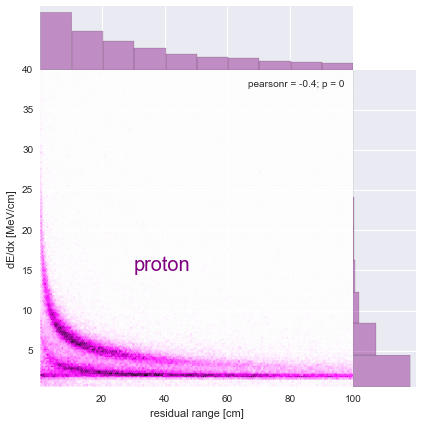

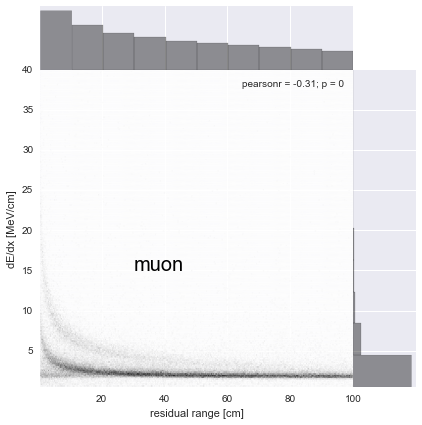

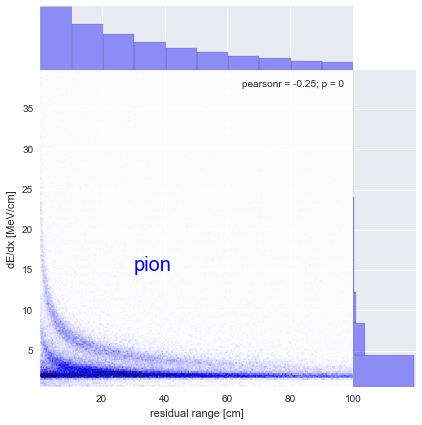

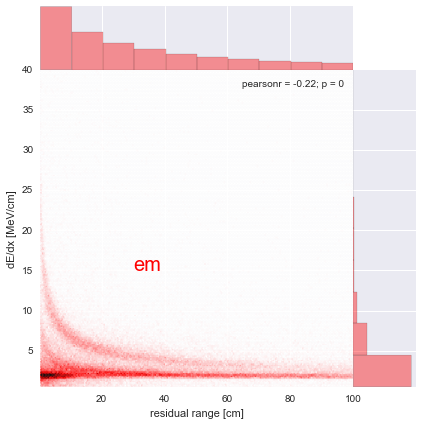

In [11]:
for df , color, label in zip([df_p,df_mu,df_pi,df_em],colors,labels):
    print 'processing plot for ',label
    data = df[df['residual-range']<100]
    data = data[data['residual-range']>0.5]
    data = data[data['dE/dx']>0.5]
    data = data[data['dE/dx']<40]
    print "data['dE/dx'].min():",data['dE/dx'].min()
    print "data['residual-range'].min():",data['residual-range'].min()

    data = data[0:Nmax]
    g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color,
                   marginal_kws=dict(bins=10))
    ax = g.ax_joint
    ax.text(30,15,label,color=color,fontsize=20)
    g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
    g.savefig('/Users/erezcohen/Desktop/%s.pdf'%label)
    print 'done generating plot for ',label


In [12]:
purity = 0.99
ana_MCp = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCprotons_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
ana_MCmu = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCmuons_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
ana_MCpi = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCpions_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
ana_MCem = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCem_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
df_p = read_tree(ana_MCp,label='protons')
df_mu = read_tree(ana_MCmu,label='muon')
df_pi = read_tree(ana_MCpi,label='pions')
df_em = read_tree(ana_MCem,label='em')

processing protons data
read protons data
processing muon data
read muon data
processing pions data
read pions data
processing em data
read em data


processing plot for  proton
data['dE/dx'].min(): 0.500005841255
data['residual-range'].min(): 0.500005245209
done generating plot for  proton
processing plot for  muon
data['dE/dx'].min(): 0.500002801418
data['residual-range'].min(): 0.500022113323
done generating plot for  muon
processing plot for  pion
data['dE/dx'].min(): 0.500069081783
data['residual-range'].min(): 0.50005531311
done generating plot for  pion
processing plot for  em
data['dE/dx'].min(): 0.500009059906
data['residual-range'].min(): 0.500001430511
done generating plot for  em


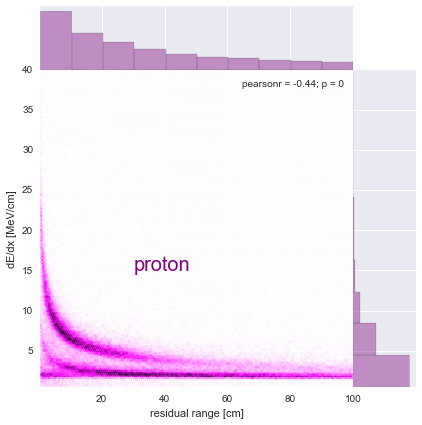

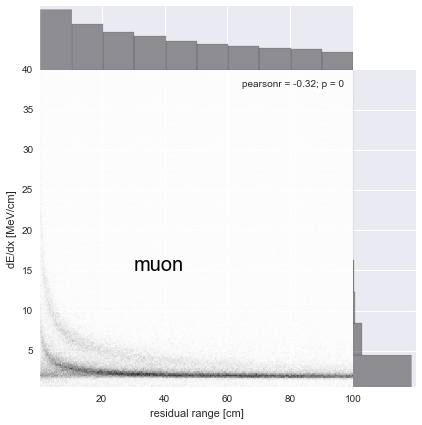

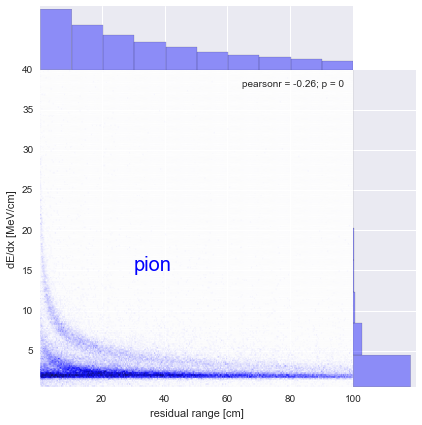

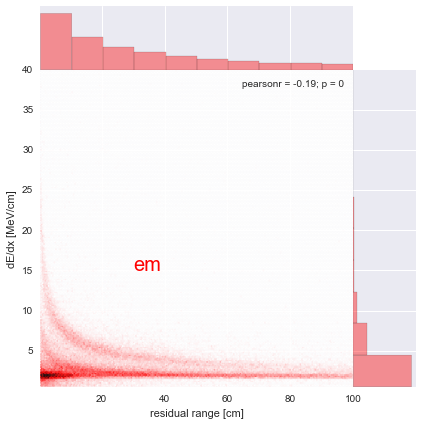

In [13]:
for df , color, label in zip([df_p,df_mu,df_pi,df_em],colors,labels):
    print 'processing plot for ',label
    data = df[df['residual-range']<100]
    data = data[data['residual-range']>0.5]
    data = data[data['dE/dx']>0.5]
    data = data[data['dE/dx']<40]
    print "data['dE/dx'].min():",data['dE/dx'].min()
    print "data['residual-range'].min():",data['residual-range'].min()

    data = data[0:Nmax]
    g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color,
                   marginal_kws=dict(bins=10))
    ax = g.ax_joint
    ax.text(30,15,label,color=color,fontsize=20)
    g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
    g.savefig('/Users/erezcohen/Desktop/%s.pdf'%label)
    print 'done generating plot for ',label

In [15]:
df_p = read_tree_fast(ana_MCp,label='protons')

processing protons data
read protons data


processing protons data
read protons data
processing muon data
read muon data
processing pions data
read pions data
processing em data
read em data
processing plot for  proton
data['dE/dx'].min(): 0.500009477139
data['residual-range'].min(): 0.500005245209
done generating plot for  proton
processing plot for  muon
data['dE/dx'].min(): 0.500062584877
data['residual-range'].min(): 0.500237703323
done generating plot for  muon
processing plot for  pion
data['dE/dx'].min(): 0.500172674656
data['residual-range'].min(): 0.500356376171
done generating plot for  pion
processing plot for  em
data['dE/dx'].min(): 0.500009059906
data['residual-range'].min(): 0.500001430511
done generating plot for  em


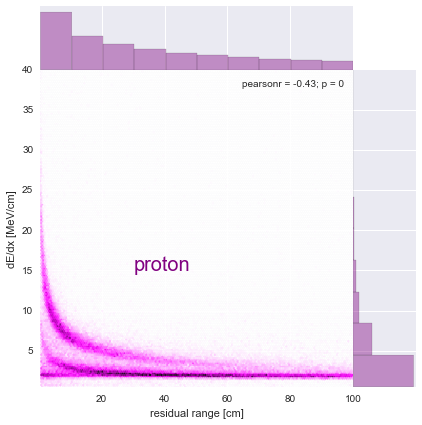

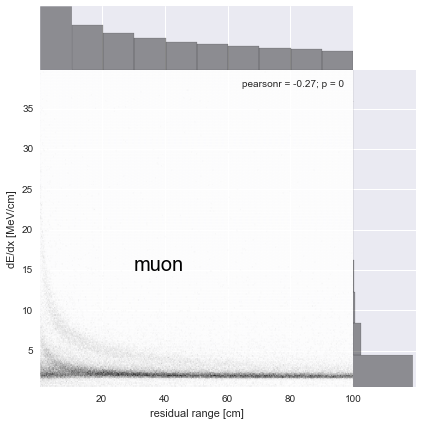

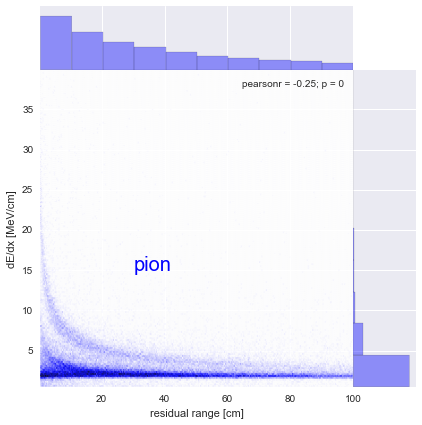

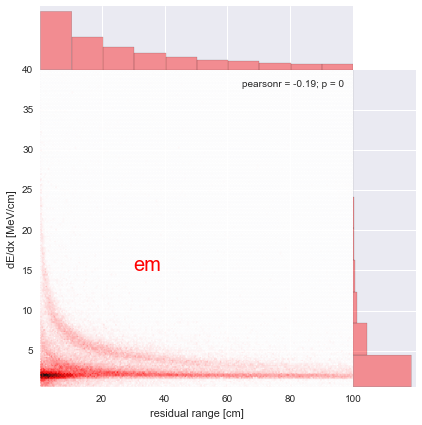

In [17]:
purity = 0.9999
ana_MCp = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCprotons_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
ana_MCmu = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCmuons_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
ana_MCpi = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCpions_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
ana_MCem = TPlots( anafiles_path + "/Tracks_" + DataName + "_MCem_trkpurity%f_AnalysisTrees.root"%purity , 'TracksTree' )
df_p = read_tree_fast(ana_MCp,label='protons')
df_mu = read_tree_fast(ana_MCmu,label='muon')
df_pi = read_tree_fast(ana_MCpi,label='pions')
df_em = read_tree_fast(ana_MCem,label='em')
for df , color, label in zip([df_p,df_mu,df_pi,df_em],colors,labels):
    print 'processing plot for ',label
    data = df[df['residual-range']<100]
    data = data[data['residual-range']>0.5]
    data = data[data['dE/dx']>0.5]
    data = data[data['dE/dx']<40]
    print "data['dE/dx'].min():",data['dE/dx'].min()
    print "data['residual-range'].min():",data['residual-range'].min()

    data = data[0:Nmax]
    g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color,
                   marginal_kws=dict(bins=10))
    ax = g.ax_joint
    ax.text(30,15,label,color=color,fontsize=20)
    g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
    g.savefig('/Users/erezcohen/Desktop/%s.pdf'%label)
    print 'done generating plot for ',label

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion
processing plot for  em
done generating plot for  em


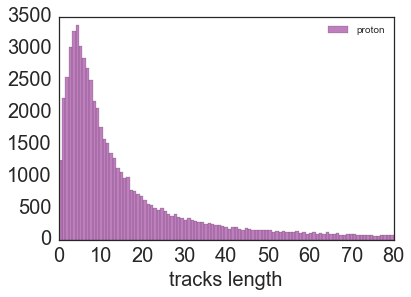

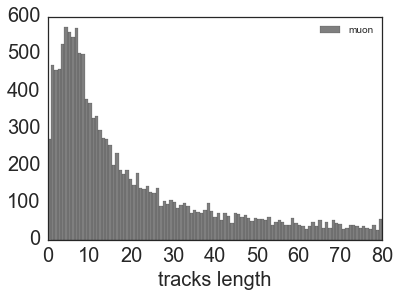

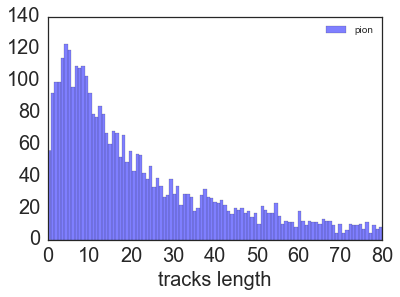

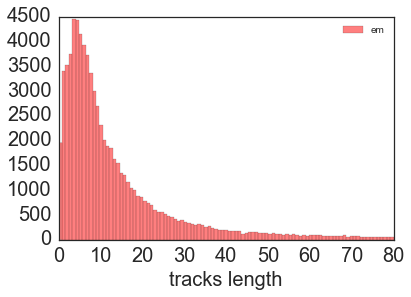

In [61]:
plot_var_x('length')

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion
processing plot for  em
done generating plot for  em


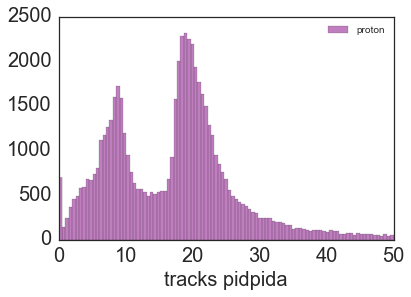

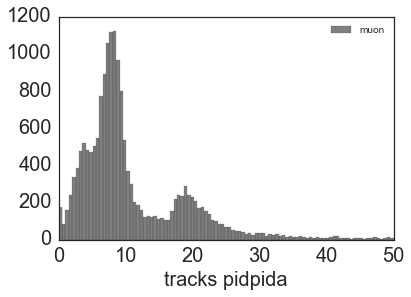

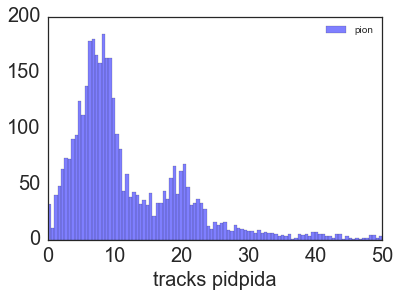

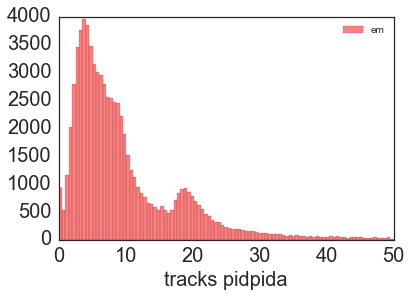

In [72]:
plot_var_x('pidpida',0,50)

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion
processing plot for  em
done generating plot for  em


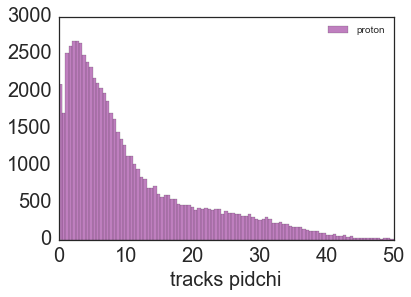

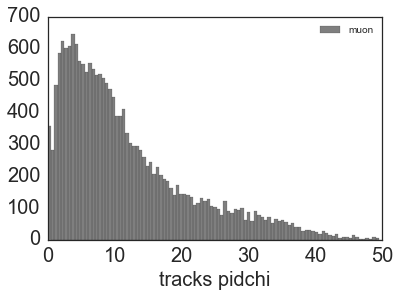

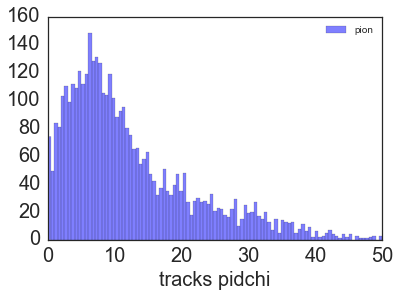

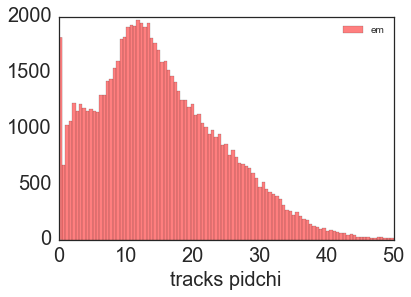

In [73]:
plot_var_x('pidchi',0,50)

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion
processing plot for  em
done generating plot for  em


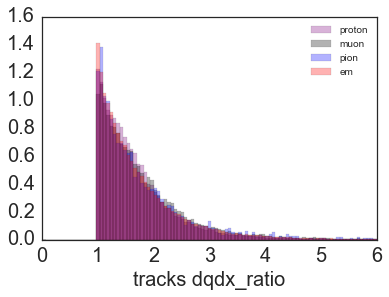

In [110]:
plot_var_x('dqdx_ratio',0,6,DoAllOnSamePlot=True)

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion
processing plot for  em
done generating plot for  em


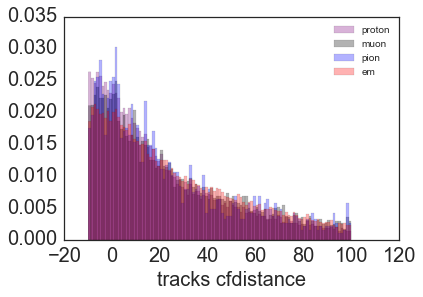

In [114]:
plot_var_x('cfdistance',-10,100,DoAllOnSamePlot=True)

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion
processing plot for  em
done generating plot for  em


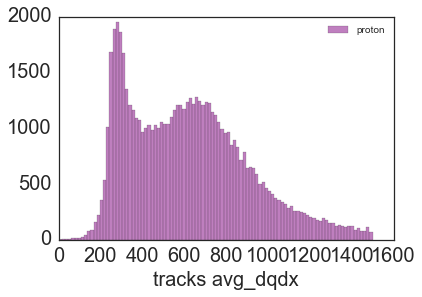

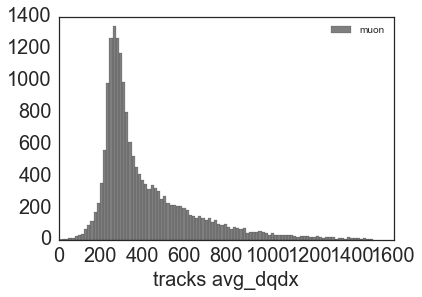

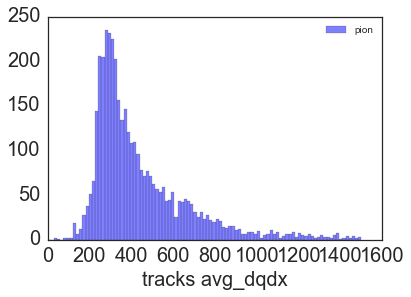

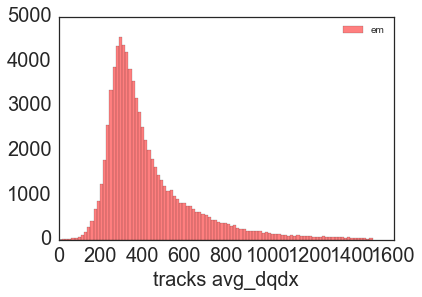

In [125]:
plot_var_x('avg_dqdx',0,1500,DoAllOnSamePlot=False)

In [9]:
pidamax = 12
scheme_name = 'pidamax_%d'%pidamax
df_p_lowpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'protons' + "_" + scheme_name + "_AnalysisTrees.root",label='protons')
df_mu_lowpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'muons' + "_" + scheme_name + "_AnalysisTrees.root",label='muon')
df_pi_lowpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'pions' + "_" + scheme_name + "_AnalysisTrees.root",label='pions')
df_em_lowpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'em' + "_" + scheme_name + "_AnalysisTrees.root",label='em')

processing protons data
Tracks_MC_BNB_MCprotons_pidamax_12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4beeb44b0>
read protons data
processing muon data
Tracks_MC_BNB_MCmuons_pidamax_12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4befc02d0>
read muon data
processing pions data
Tracks_MC_BNB_MCpions_pidamax_12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4befc02d0>
read pions data
processing em data
Tracks_MC_BNB_MCem_pidamax_12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe47d1fbe00>
read em data


In [13]:
pidamin = 12
scheme_name = 'pidamin%d'%pidamin 
df_p_highpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'protons' + "_" + scheme_name + "_AnalysisTrees.root",label='protons')
df_mu_highpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'muons' + "_" + scheme_name + "_AnalysisTrees.root",label='muon')
df_pi_highpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'pions' + "_" + scheme_name + "_AnalysisTrees.root",label='pions')
df_em_highpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'em' + "_" + scheme_name + "_AnalysisTrees.root",label='em')

processing protons data
Tracks_MC_BNB_MCprotons_pidamin12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4c00441f0>
read protons data
processing muon data
Tracks_MC_BNB_MCmuons_pidamin12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4ad0fbe00>
read muon data
processing pions data
Tracks_MC_BNB_MCpions_pidamin12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4b46fbe00>
read pions data
processing em data
Tracks_MC_BNB_MCem_pidamin12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4ad0fbe00>
read em data


processing plot for  proton
data['dE/dx'].min(): 0.501452624798
data['residual-range'].min(): 0.500848591328
done generating plot for  proton
processing plot for  muon
data['dE/dx'].min(): 0.500324785709
data['residual-range'].min(): 0.5012845397
done generating plot for  muon
processing plot for  pion
data['dE/dx'].min(): 0.500281214714
data['residual-range'].min(): 0.502613008022
done generating plot for  pion
processing plot for  em
data['dE/dx'].min(): 0.500550806522
data['residual-range'].min(): 0.5002348423
done generating plot for  em


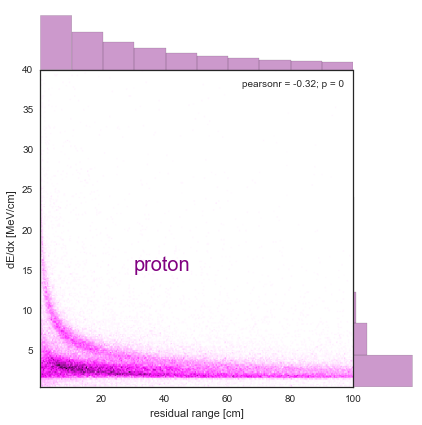

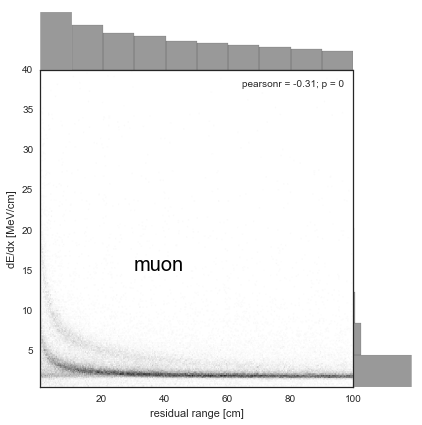

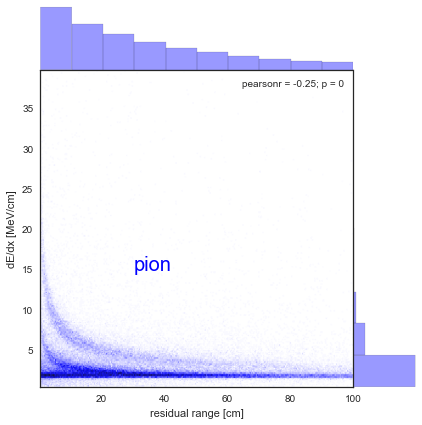

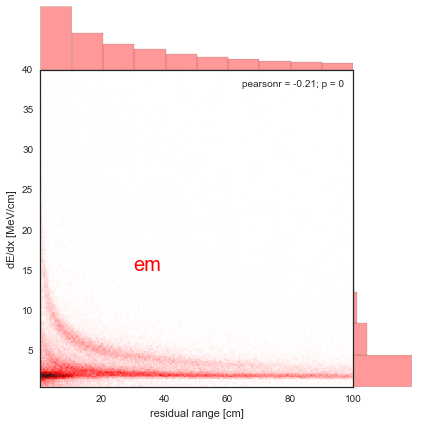

In [16]:
plot_dEdx_profile( df_p_lowpida, df_mu_lowpida , df_pi_lowpida , df_em_lowpida , Nmax = 100000)

processing plot for  proton
len(data proton) = 100000
data['dE/dx'].min(): 0.500324785709
data['residual-range'].min(): 0.50022995472
done generating plot for  proton
processing plot for  muon
len(data muon) = 100000
data['dE/dx'].min(): 0.500178098679
data['residual-range'].min(): 0.500040352345
done generating plot for  muon
processing plot for  pion
len(data pion) = 100000
data['dE/dx'].min(): 0.500059008598
data['residual-range'].min(): 0.500471174717
done generating plot for  pion
processing plot for  em
len(data em) = 100000
data['dE/dx'].min(): 0.500069081783
data['residual-range'].min(): 0.500082790852
done generating plot for  em


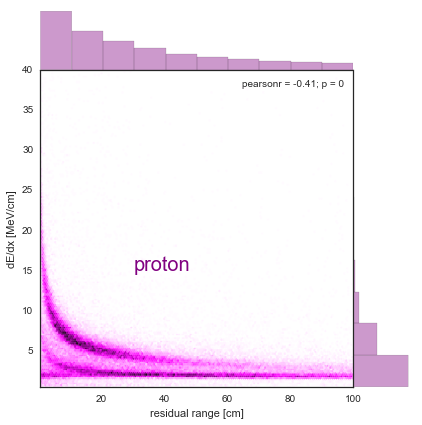

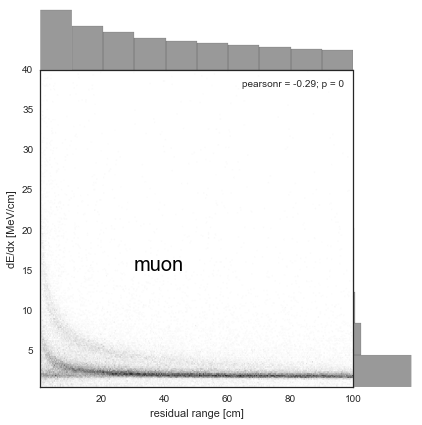

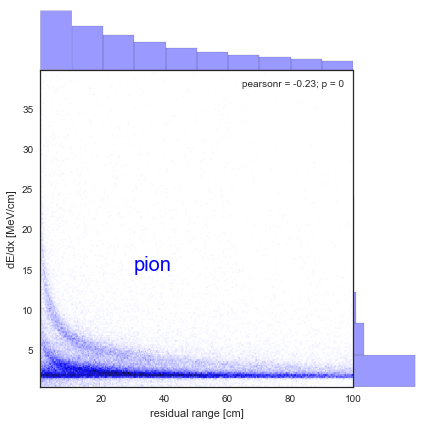

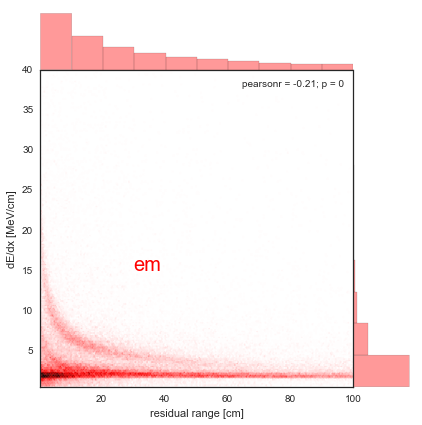

In [18]:
plot_dEdx_profile( df_p_highpida, df_mu_highpida , df_pi_highpida , df_em_highpida , Nmax = 100000)

In [19]:
pidamax = 5
scheme_name = 'pidamax_%d'%pidamax
df_p_lowpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'protons' + "_" + scheme_name + "_AnalysisTrees.root",label='protons')


processing protons data
Tracks_MC_BNB_MCprotons_pidamax_5_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4a5a36d60>
read protons data
processing protons data
Tracks_MC_BNB_MCprotons_pidamin12_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4a5850a60>
read protons data


In [22]:
pidamin = 5
scheme_name = 'pidamin%d'%pidamin 
df_p_highpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'protons' + "_" + scheme_name + "_AnalysisTrees.root",label='protons')

processing protons data
Tracks_MC_BNB_MCprotons_pidamin5_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe4a342cd00>
read protons data


processing plot for  proton
len(data proton) = 100000
data['dE/dx'].min(): 0.50004118681
data['residual-range'].min(): 0.500787734985
done generating plot for  proton
processing plot for  muon
len(data muon) = 100000
data['dE/dx'].min(): 0.500324785709
data['residual-range'].min(): 0.5012845397
done generating plot for  muon
processing plot for  pion
len(data pion) = 100000
data['dE/dx'].min(): 0.500281214714
data['residual-range'].min(): 0.502613008022
done generating plot for  pion
processing plot for  em
len(data em) = 100000
data['dE/dx'].min(): 0.500550806522
data['residual-range'].min(): 0.5002348423
done generating plot for  em


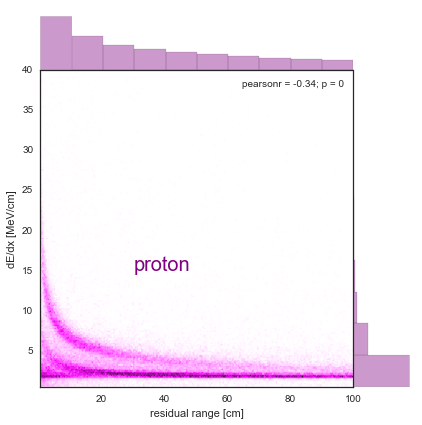

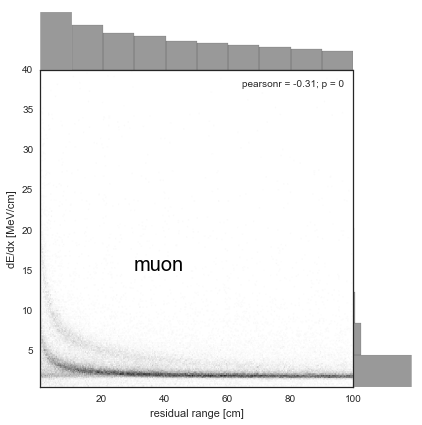

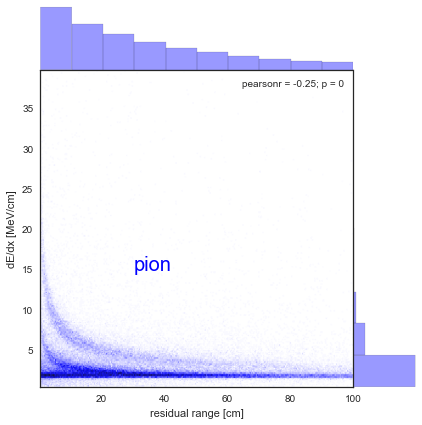

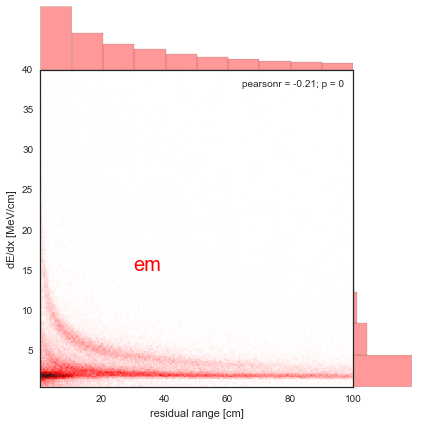

In [20]:
plot_dEdx_profile( df_p_lowpida, df_mu_lowpida , df_pi_lowpida , df_em_lowpida , Nmax = 100000)

processing plot for  proton
len(data proton) = 100000
data['dE/dx'].min(): 0.500324785709
data['residual-range'].min(): 0.50022995472
done generating plot for  proton
processing plot for  muon
len(data muon) = 100000
data['dE/dx'].min(): 0.500178098679
data['residual-range'].min(): 0.500040352345
done generating plot for  muon
processing plot for  pion
len(data pion) = 100000
data['dE/dx'].min(): 0.500059008598
data['residual-range'].min(): 0.500471174717
done generating plot for  pion
processing plot for  em
len(data em) = 100000
data['dE/dx'].min(): 0.500069081783
data['residual-range'].min(): 0.500082790852
done generating plot for  em


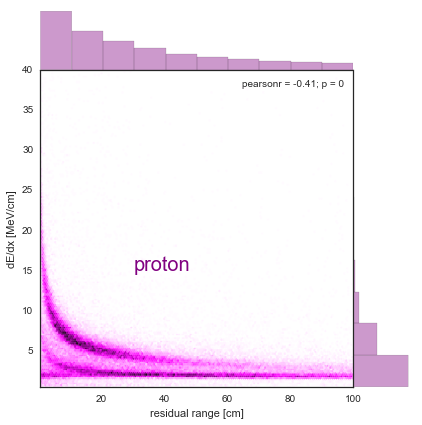

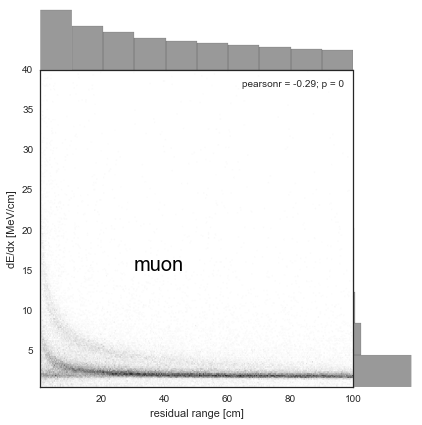

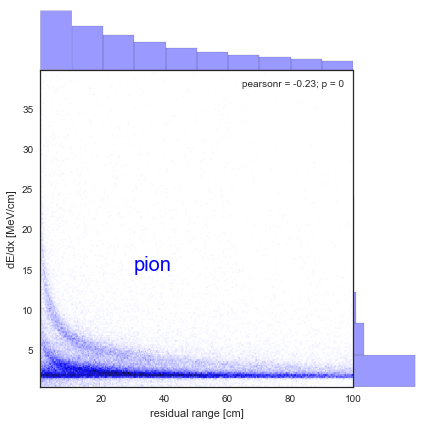

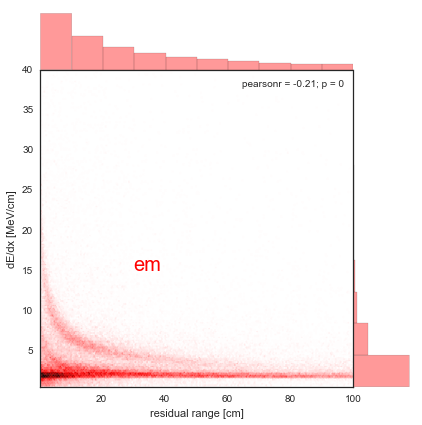

In [21]:
plot_dEdx_profile( df_p_highpida, df_mu_highpida , df_pi_highpida , df_em_highpida , Nmax = 100000)

In [23]:
pidamax = 1
scheme_name = 'pidamax_%d'%pidamax
df_p_lowpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'protons' + "_" + scheme_name + "_AnalysisTrees.root",label='protons')



processing protons data
Tracks_MC_BNB_MCprotons_pidamax_1_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe474bfbe00>
read protons data


In [24]:
pidamin = 20
scheme_name = 'pidamin%d'%pidamin 
df_p_highpida = read_tree_fast("Tracks_" + DataName + "_MC" + 'protons' + "_" + scheme_name + "_AnalysisTrees.root",label='protons')

processing protons data
Tracks_MC_BNB_MCprotons_pidamin20_AnalysisTrees.root
<ROOT.TTree object ("TracksTree") at 0x7fe468dfbe00>
read protons data


processing plot for  proton
len(data proton) = 137869
data['dE/dx'].min(): 0.500069737434
data['residual-range'].min(): 0.500152945518
done generating plot for  proton
processing plot for  muon
len(data muon) = 1000000
data['dE/dx'].min(): 0.500043451786
data['residual-range'].min(): 0.500092983246
done generating plot for  muon
processing plot for  pion
len(data pion) = 1000000
data['dE/dx'].min(): 0.500065326691
data['residual-range'].min(): 0.500057935715
done generating plot for  pion
processing plot for  em
len(data em) = 1000000
data['dE/dx'].min(): 0.500019431114
data['residual-range'].min(): 0.500006973743
done generating plot for  em


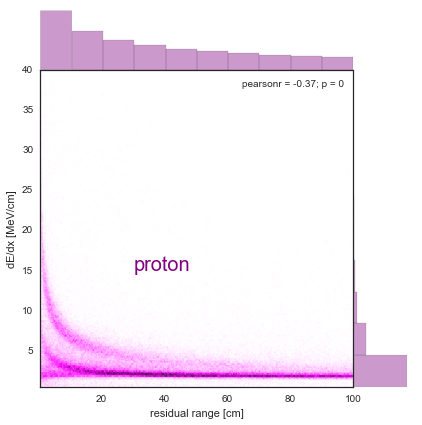

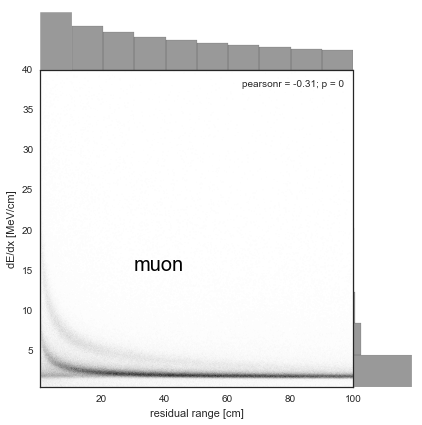

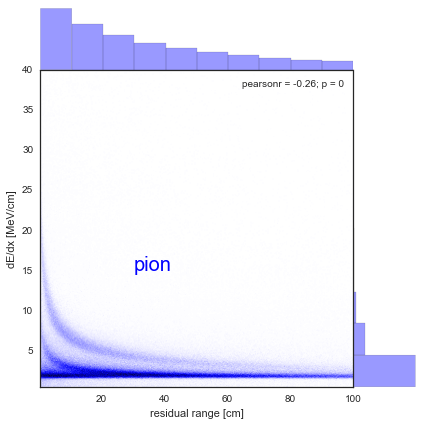

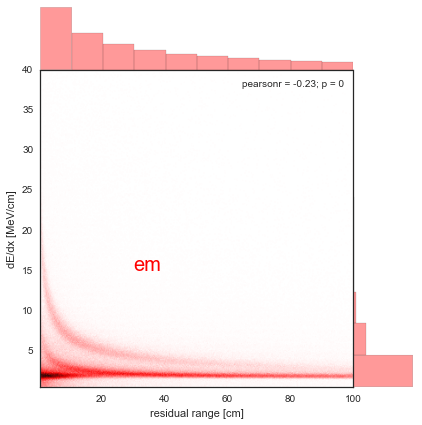

In [26]:
plot_dEdx_profile( df_p_lowpida, df_mu_lowpida , df_pi_lowpida , df_em_lowpida , Nmax = 1000000)

processing plot for  proton
len(data proton) = 1000000
data['dE/dx'].min(): 0.50013512373
data['residual-range'].min(): 0.500040352345
done generating plot for  proton
processing plot for  muon
len(data muon) = 1000000
data['dE/dx'].min(): 0.500002801418
data['residual-range'].min(): 0.500006973743
done generating plot for  muon
processing plot for  pion
len(data pion) = 1000000
data['dE/dx'].min(): 0.500034511089
data['residual-range'].min(): 0.500101149082
done generating plot for  pion
processing plot for  em
len(data em) = 1000000
data['dE/dx'].min(): 0.500010609627
data['residual-range'].min(): 0.500002682209
done generating plot for  em


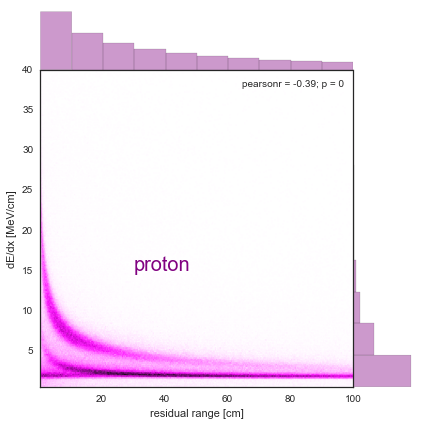

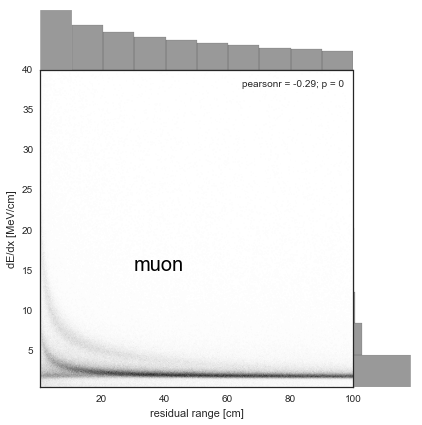

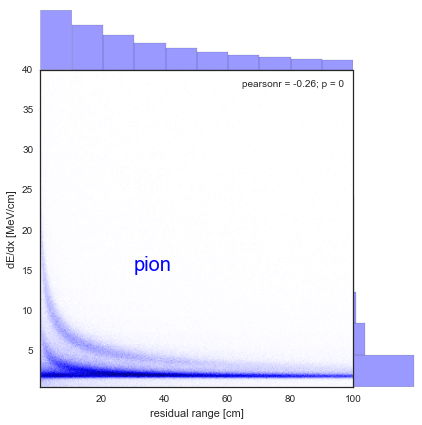

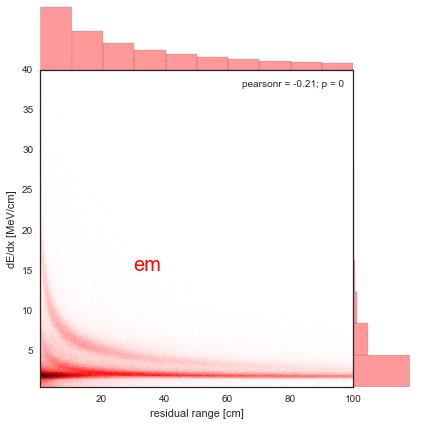

In [28]:
plot_dEdx_profile( df_p_highpida, df_mu_highpida , df_pi_highpida , df_em_highpida , Nmax = 1000000)

processing plot for  muons
len(data muons) = 437823
generated sns plot....
done generating plot for  muons
processing plot for  protons
len(data protons) = 500000
generated sns plot....
done generating plot for  protons
processing plot for  pions
len(data pions) = 500000
generated sns plot....
done generating plot for  pions


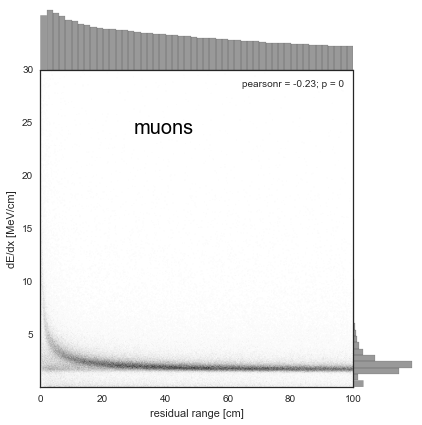

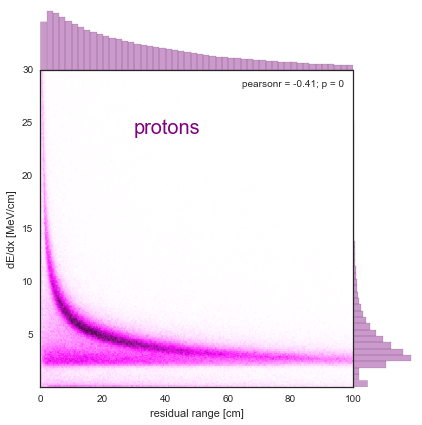

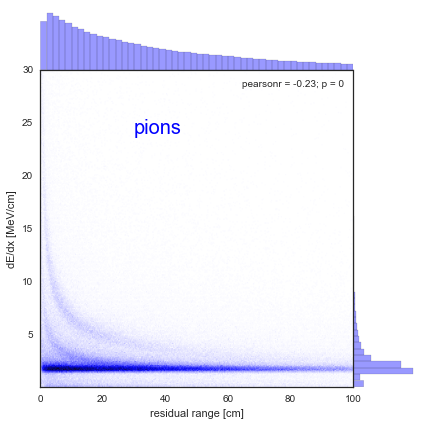

In [78]:
plot_dEdx_single_dataset( df_muons , 'muons' , 500000 )
plot_dEdx_single_dataset( df_protons , 'protons' , 500000 )
plot_dEdx_single_dataset( df_pions , 'pions' , 500000 )

plot pions
plot protons
plot muons


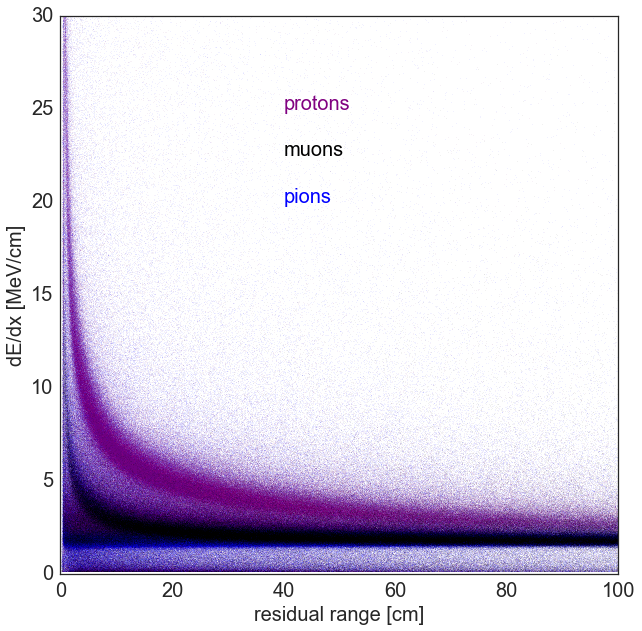

In [107]:
s , alpha = 0.01 , 0.5
fig,ax = plt.subplots(figsize=[10,10])
plt.scatter(df_pions['residual-range'],df_pions['dE/dx'],color='blue',label="$\pi$",s=0.01,alpha=0.5)
plt.text(40,20,'pions',color='blue',fontsize=20)
print 'plot pions'
plt.scatter(df_protons['residual-range'],df_protons['dE/dx'],color='purple',label="protons",s=0.01,alpha=0.5)
plt.text(40,25,'protons',color='purple',fontsize=20)
print 'plot protons'
plt.scatter(df_muons['residual-range'],df_muons['dE/dx'],color='black',label="$\mu$",s=0.01,alpha=0.5)
plt.text(40,22.5,'muons',color='black',fontsize=20)
print 'plot muons'
plt.axis([0,100,0,30],size=20)
pt.set_axes(ax , 'residual range [cm]' , 'dE/dx [MeV/cm]')

In [99]:
bins=100
extent=[0,100,0,30]
hdEdx_muons, x , y = np.histogram2d(df_muons['dE/dx'],df_muons['residual-range'], bins=bins)
hdEdx_protons, x , y = np.histogram2d(df_protons['dE/dx'],df_protons['residual-range'], bins=bins)

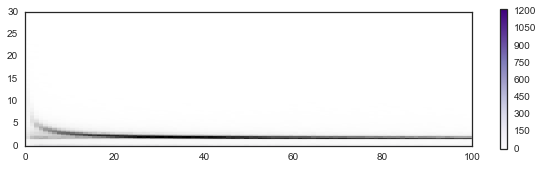

In [102]:
fig,ax = plt.subplots(figsize=[10,10])
# X, Y = np.meshgrid(x_muons, y_muons)
# ax.pcolormesh(X, Y, dEdx_protons, cmap='Purples')
# ax.pcolormesh(X, Y, dEdx_muons , cmap='Greys')
ima = ax.imshow(hdEdx_protons[::-1,:],interpolation='none',cmap='Purples',extent=extent)
cba = plt.colorbar(ima,shrink=0.25)
imb = ax.imshow(hdEdx_muons[::-1,:],interpolation='none',cmap='Greys',extent=extent)
# cbb = plt.colorbar(imb,shrink=0.25)
# ax.imshow(hdEdx_muons[::-1,:],interpolation='none',cmap='Greys',extent=extent)
# ax.imshow(dEdx_protons,interpolation='nearest',cmap='Purples',
#           extent=[x_protons[0], x_protons[-1], y_protons[0], y_protons[-1]])

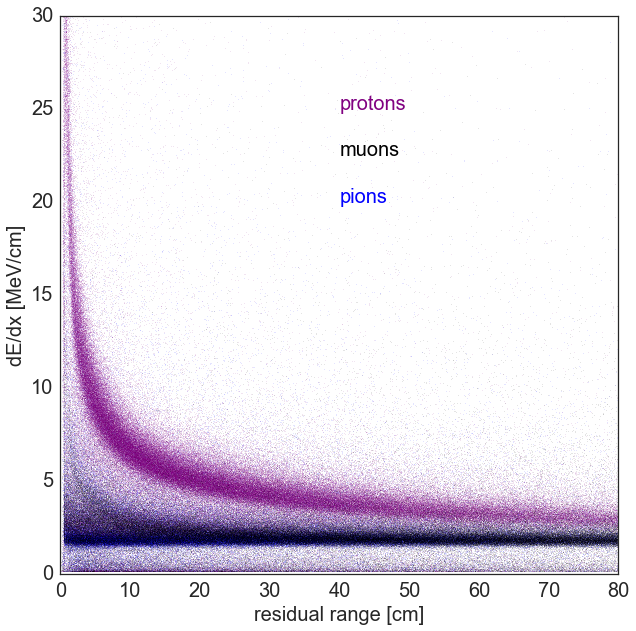

In [117]:
s , alpha = 0.01 , 1
fig,ax = plt.subplots(figsize=[10,10])
plt.scatter(df_pions_highpurity['residual-range'],df_pions_highpurity['dE/dx'],color='blue',label="$\pi$",s=s,alpha=alpha)
plt.text(40,20,'pions',color='blue',fontsize=20)
plt.scatter(df_protons_highpurity['residual-range'],df_protons_highpurity['dE/dx'],color='purple',label="protons",s=s,alpha=alpha)
plt.text(40,25,'protons',color='purple',fontsize=20)
plt.scatter(df_muons_highpurity['residual-range'],df_muons_highpurity['dE/dx'],color='black',label="$\mu$",s=s,alpha=alpha)
plt.text(40,22.5,'muons',color='black',fontsize=20)
plt.axis([0,80,0,30],size=20)
pt.set_axes(ax , 'residual range [cm]' , 'dE/dx [MeV/cm]')

processing plot for  muons
len(data muons) = 185738
generated sns plot....
done generating plot for  muons
processing plot for  protons
len(data protons) = 269216
generated sns plot....
done generating plot for  protons
processing plot for  pions
len(data pions) = 147689
generated sns plot....
done generating plot for  pions


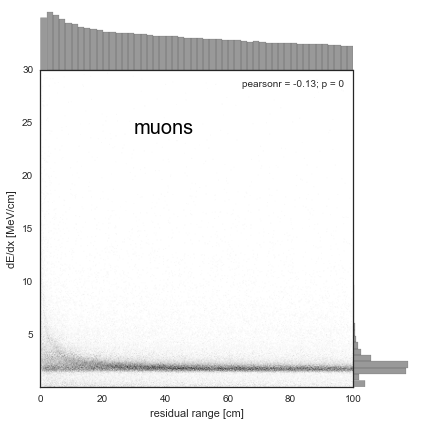

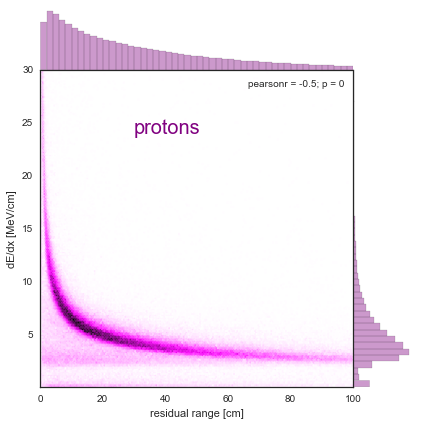

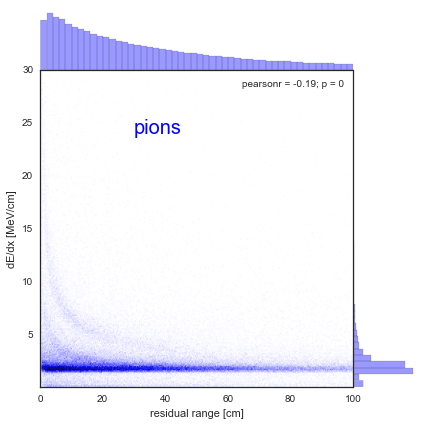

In [118]:
plot_dEdx_single_dataset( df_muons_highpurity , 'muons' , 500000 )
plot_dEdx_single_dataset( df_protons_highpurity , 'protons' , 500000 )
plot_dEdx_single_dataset( df_pions_highpurity , 'pions' , 500000 )

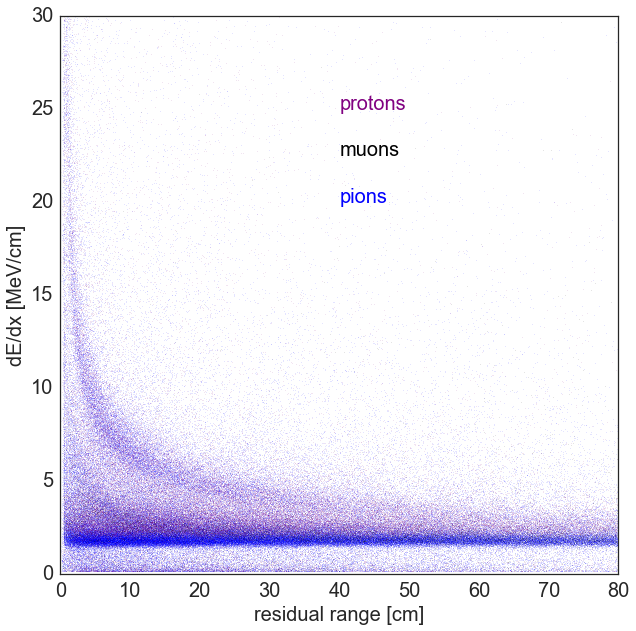

In [119]:
s , alpha = 0.01 , 1
fig,ax = plt.subplots(figsize=[10,10])
plt.scatter(df_pions_lowpurity['residual-range'],df_pions_lowpurity['dE/dx'],color='blue',label="$\pi$",s=s,alpha=alpha)
plt.text(40,20,'pions',color='blue',fontsize=20)
plt.scatter(df_protons_lowpurity['residual-range'],df_protons_lowpurity['dE/dx'],color='purple',label="protons",s=s,alpha=alpha)
plt.text(40,25,'protons',color='purple',fontsize=20)
plt.scatter(df_muons_lowpurity['residual-range'],df_muons_lowpurity['dE/dx'],color='black',label="$\mu$",s=s,alpha=alpha)
plt.text(40,22.5,'muons',color='black',fontsize=20)
plt.axis([0,80,0,30],size=20)
pt.set_axes(ax , 'residual range [cm]' , 'dE/dx [MeV/cm]')

processing plot for  muons
len(data muons) = 16681
generated sns plot....
done generating plot for  muons
processing plot for  protons
len(data protons) = 69051
generated sns plot....
done generating plot for  protons
processing plot for  pions
len(data pions) = 178592
generated sns plot....
done generating plot for  pions


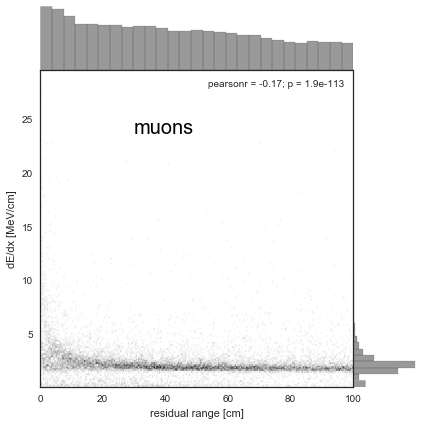

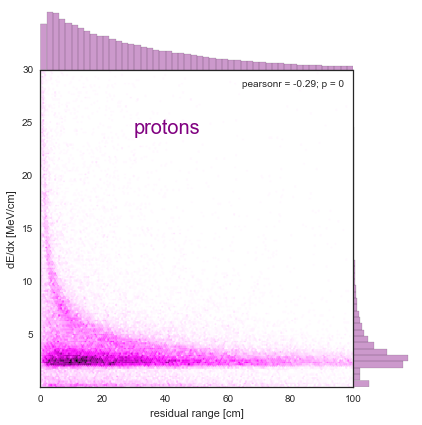

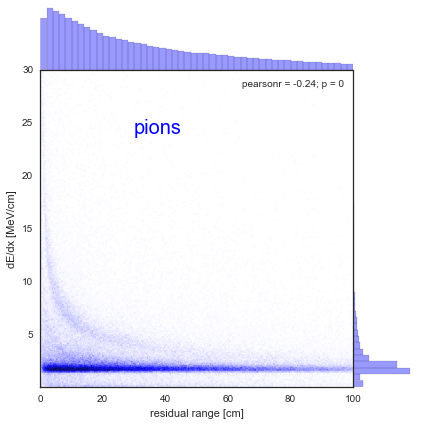

In [121]:
plot_dEdx_single_dataset( df_muons_lowpurity , 'muons' , 500000 )
plot_dEdx_single_dataset( df_protons_lowpurity , 'protons' , 500000 )
plot_dEdx_single_dataset( df_pions_lowpurity , 'pions' , 500000 )

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion


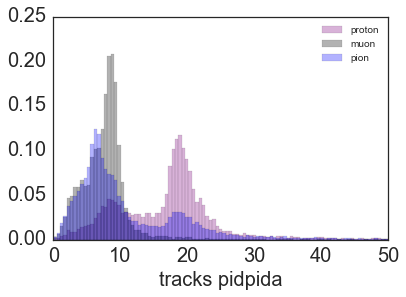

In [23]:
plot_var_x([df_protons_float,df_muons_float,df_pions_float],'pidpida',0,50,DoAllOnSamePlot=True)

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion


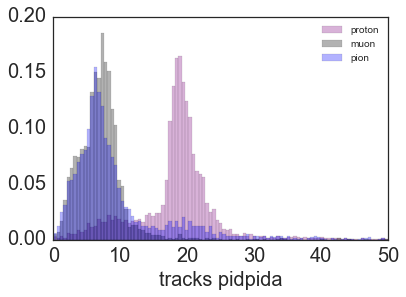

In [24]:
plot_var_x([df_protons_highpurity_float,df_muons_highpurity_float,df_pions_highpurity_float],'pidpida',0,50,DoAllOnSamePlot=True)

processing plot for  proton
done generating plot for  proton
processing plot for  muon
done generating plot for  muon
processing plot for  pion
done generating plot for  pion


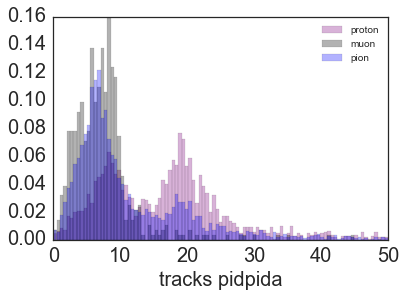

In [25]:
plot_var_x([df_protons_lowpurity_float,df_muons_lowpurity_float,df_pions_lowpurity_float],'pidpida',0,50,DoAllOnSamePlot=True)

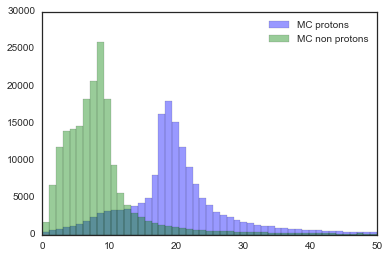

In [52]:
bins = np.linspace(0,50,50)
plt.hist(df_MCBNB_protons.pidpida[df_MCBNB_protons.pidpida<100],bins=bins,color='blue',alpha=0.4,label='MC protons')
plt.hist(df_MCBNB_nonprotons.pidpida[df_MCBNB_nonprotons.pidpida<100],bins=bins,color='green',alpha=0.4,label='MC non protons')
plt.legend()

In [41]:
df_MCBNB_protons_highpurity=df_MCBNB_protons[df_MCBNB_protons.purtruth_Y==1]
df_MCBNB_protons_lowpurity=df_MCBNB_protons[df_MCBNB_protons.purtruth_Y<0.5]
df_MCBNB_nonprotons_highpurity=df_MCBNB_nonprotons[df_MCBNB_nonprotons.purtruth_Y==1]
df_MCBNB_nonprotons_lowpurity=df_MCBNB_nonprotons[df_MCBNB_nonprotons.purtruth_Y<0.5]

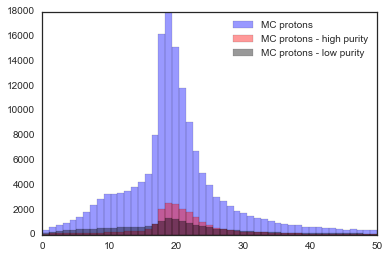

In [53]:
plt.hist(df_MCBNB_protons.pidpida[df_MCBNB_protons.pidpida<100],bins=bins,color='blue',alpha=0.4,label='MC protons')
plt.hist(df_MCBNB_protons_highpurity.pidpida[df_MCBNB_protons_highpurity.pidpida<100],bins=bins,color='red',alpha=0.4,label='MC protons - high purity')
plt.hist(df_MCBNB_protons_lowpurity.pidpida[df_MCBNB_protons_lowpurity.pidpida<100],bins=bins,color='black',alpha=0.4,label='MC protons - low purity')
plt.legend()

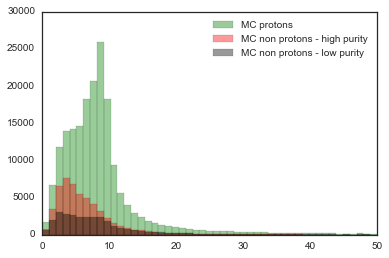

In [54]:
plt.hist(df_MCBNB_nonprotons.pidpida[df_MCBNB_nonprotons.pidpida<100],bins=bins,color='green',alpha=0.4,label='MC protons')
plt.hist(df_MCBNB_nonprotons_highpurity.pidpida[df_MCBNB_nonprotons_highpurity.pidpida<100],bins=bins,color='red',alpha=0.4,label='MC non protons - high purity')
plt.hist(df_MCBNB_nonprotons_lowpurity.pidpida[df_MCBNB_nonprotons_lowpurity.pidpida<100],bins=bins,color='black',alpha=0.4,label='MC non protons - low purity')
plt.legend()